# Классификация - и снова в бой!


Сегодня мы поговорим о том, чему же мы научились за последние практики?

Мы освоили основные методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!

Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!

В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.

Как всегда, ждем от вас полноценного анализа исходных данных, необходимой предобработки, feature engineering и поиск лучшего варианта, который даст наибольшую метрику!

* Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

Мы желаем вам удачи - постарайтесь применить все накопленные знания и, может, чуть больше! Успехов!

Импортируем необходимые библиотеки:


In [1]:
%pip install numpy==1.26.4 pandas==2.2.2 scikit-learn==1.4.2

import numpy as np
import pandas as pd
import sklearn as skl


# Проверка правильности установленных версий
print(np.__version__)
print(pd.__version__)
print(skl.__version__)


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
1.26.4
2.2.2
1.4.2


Настройка визуализации и фиксирование RANDOM_SEED:

In [2]:
# Зафиксируем состояние случайных чисел
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns

# Импорт необходимых библиотек для обучения модели и снятия метрик

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Настройка для визуализации
TEXT_COLOR = "black"

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["text.color"] = TEXT_COLOR
plt.rcParams["font.size"] = 14
plt.rcParams["lines.markersize"] = 15
plt.rcParams["axes.labelcolor"] = TEXT_COLOR
plt.rcParams["xtick.color"] = TEXT_COLOR
plt.rcParams["ytick.color"] = TEXT_COLOR

sns.set_style("darkgrid")

# Зафиксируем состояние случайных чисел
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

## Просмотр и анализ данных

Загрузим данные датасета:

In [3]:
df_src = pd.read_csv("heart_disease.csv")

Посмотрим размер данных:

In [4]:
df_src.shape

(297, 14)

Взглянем на данные датасета. Выведем первые 10 строк:

In [5]:
df_src.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   
5   64    1   0       170   227    0        2      155      0      0.6      1   
6   63    1   0       145   233    1        2      150      0      2.3      2   
7   61    1   0       134   234    0        0      145      0      2.6      1   
8   60    0   0       150   240    0        0      171      0      0.9      0   
9   59    1   0       178   270    0        2      145      0      4.2      2   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
5   0     2          0  
6   0     1          0  
7   2     0          1  
8   0     0          0  
9   0     2          0

Выведем информацию по датасету:

In [6]:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Убедимся, что пропуски в данных отсутствуют:

In [7]:
df_src.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Поскольку задача состоит в том, чтобы предсказать, есть ли заболевание сердца у человека или нет, то выделим переменную *condition*, где:

0 - нет заболевания;
1 - есть заболевание.

In [8]:
df_src["condition"] = df_src["condition"].astype("category")
# И посмотрим типы теперь:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        297 non-null    int64   
 1   sex        297 non-null    int64   
 2   cp         297 non-null    int64   
 3   trestbps   297 non-null    int64   
 4   chol       297 non-null    int64   
 5   fbs        297 non-null    int64   
 6   restecg    297 non-null    int64   
 7   thalach    297 non-null    int64   
 8   exang      297 non-null    int64   
 9   oldpeak    297 non-null    float64 
 10  slope      297 non-null    int64   
 11  ca         297 non-null    int64   
 12  thal       297 non-null    int64   
 13  condition  297 non-null    category
dtypes: category(1), float64(1), int64(12)
memory usage: 30.7 KB


In [9]:
df_src["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

## Визуализация данных

Сделаем визуалиацию `value_counts()` для удобного восприятия информации:

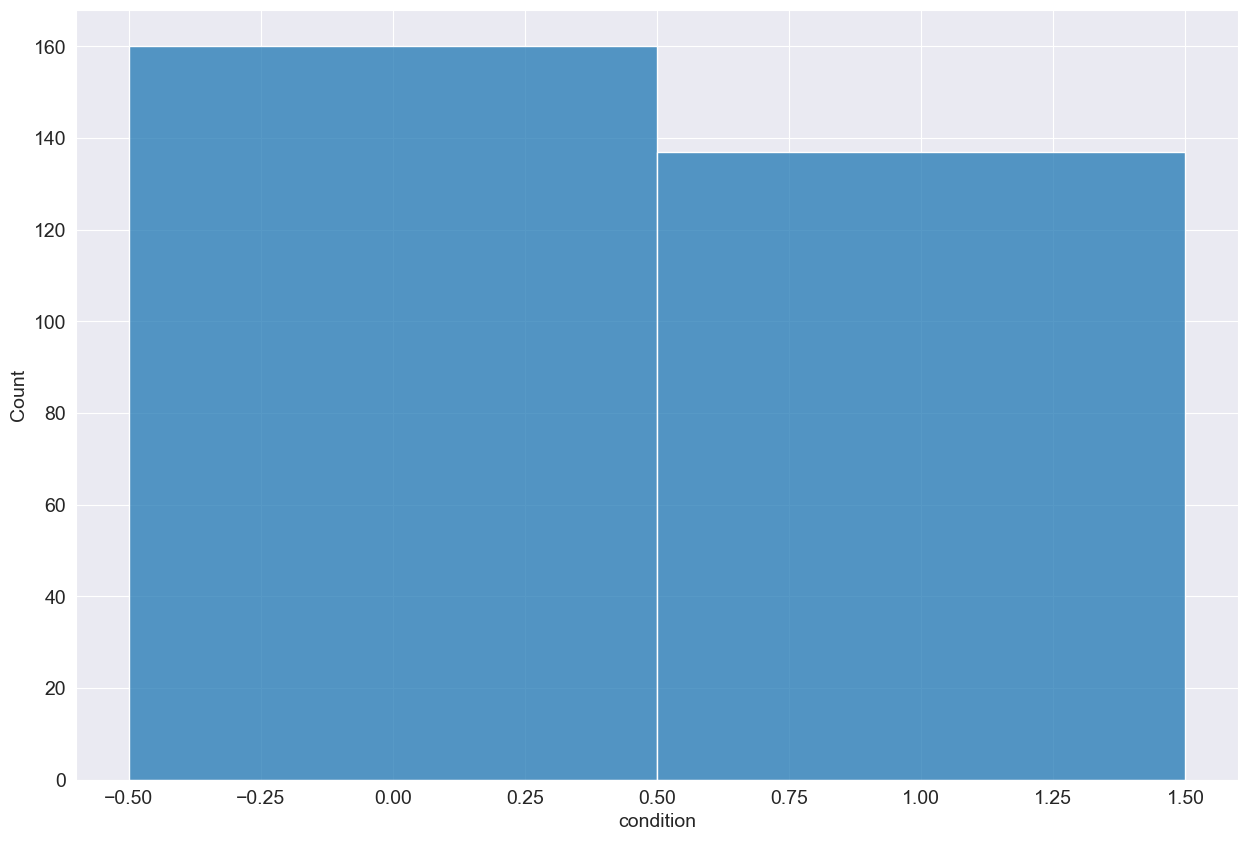

In [10]:
sns.histplot(df_src, x="condition")
plt.show()

Теперь, построим цветовую разметку Hue для наших данных:

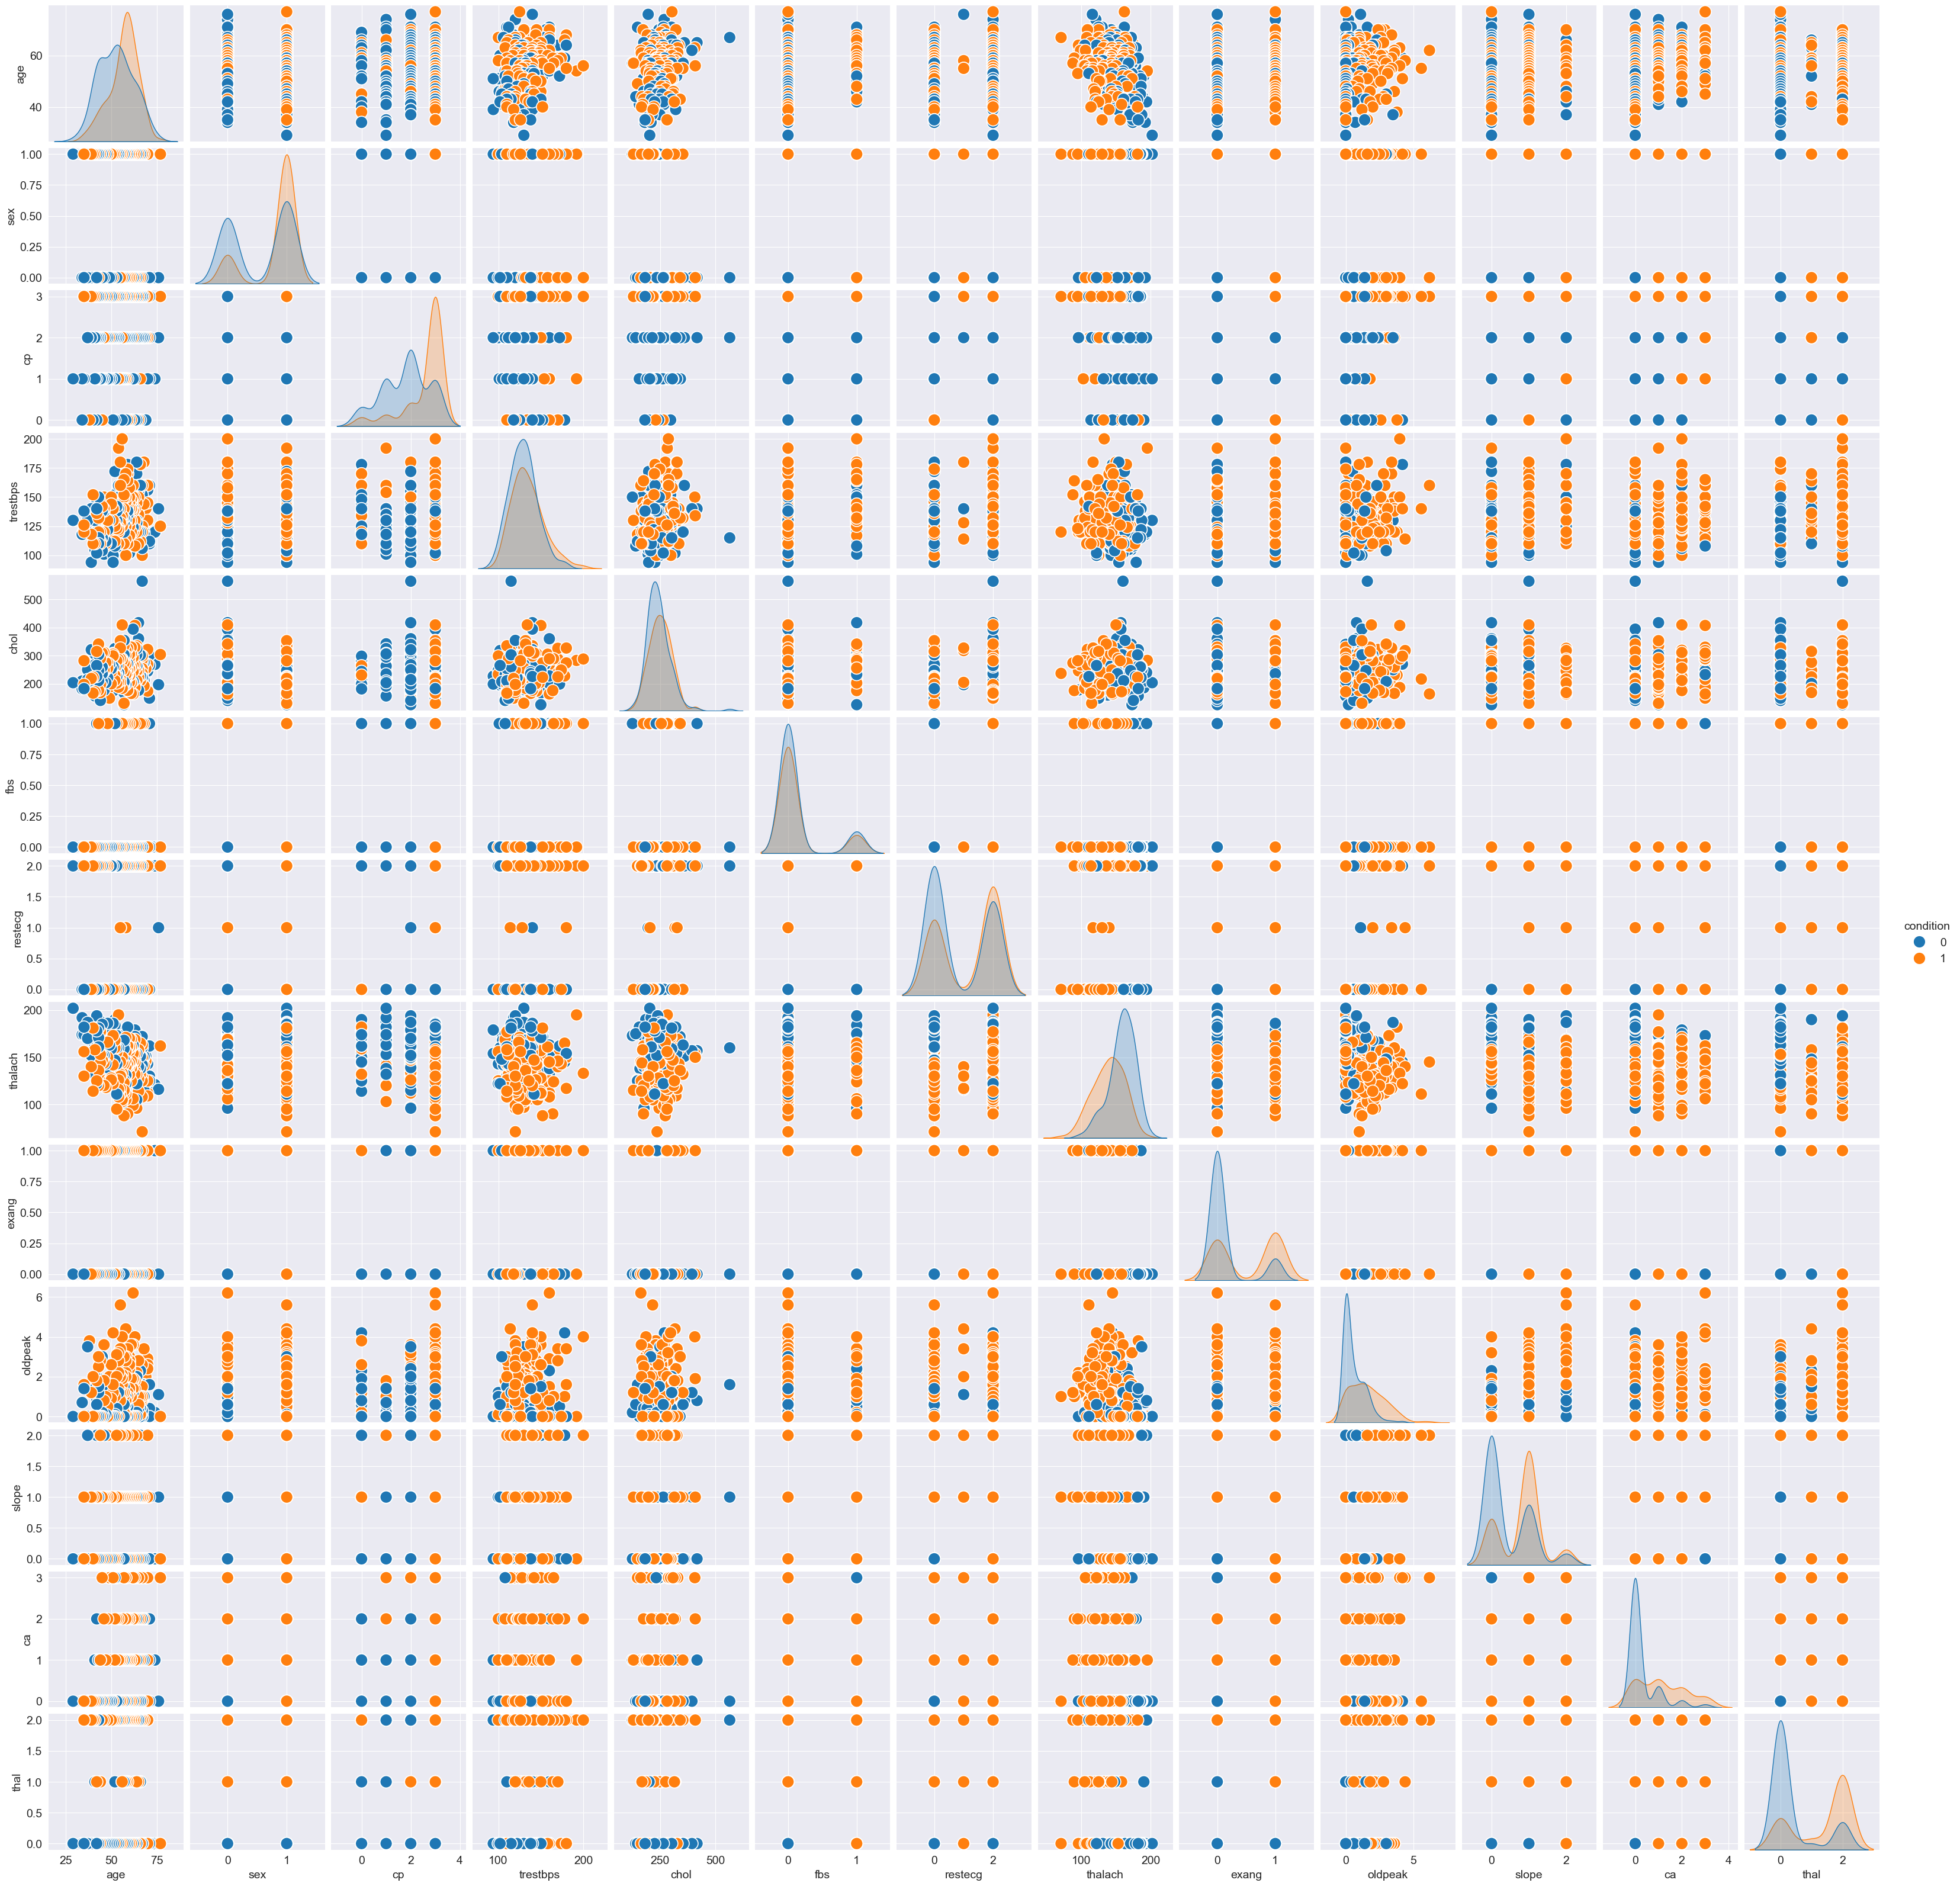

In [11]:
sns.pairplot(df_src, hue="condition")
plt.show()

Построим график "ящик с усами", для оценки распределения:

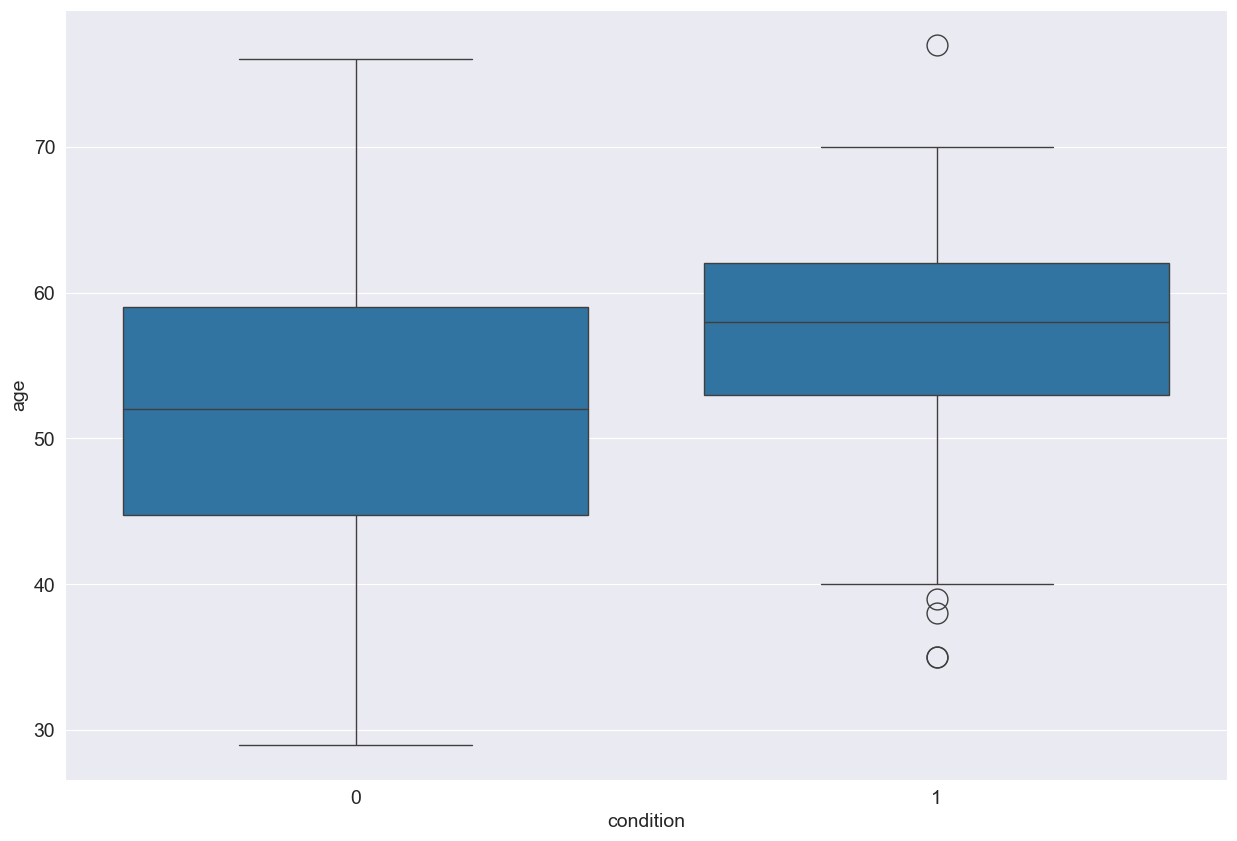

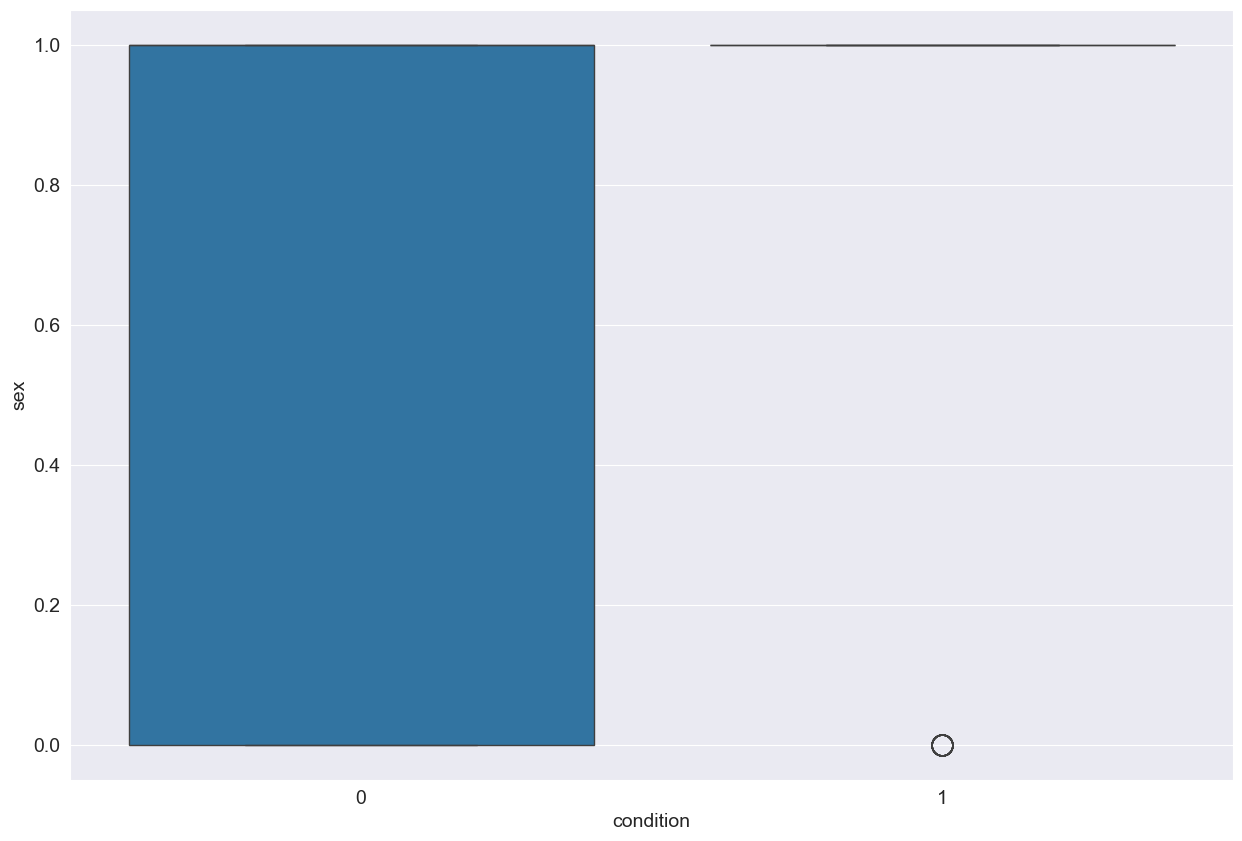

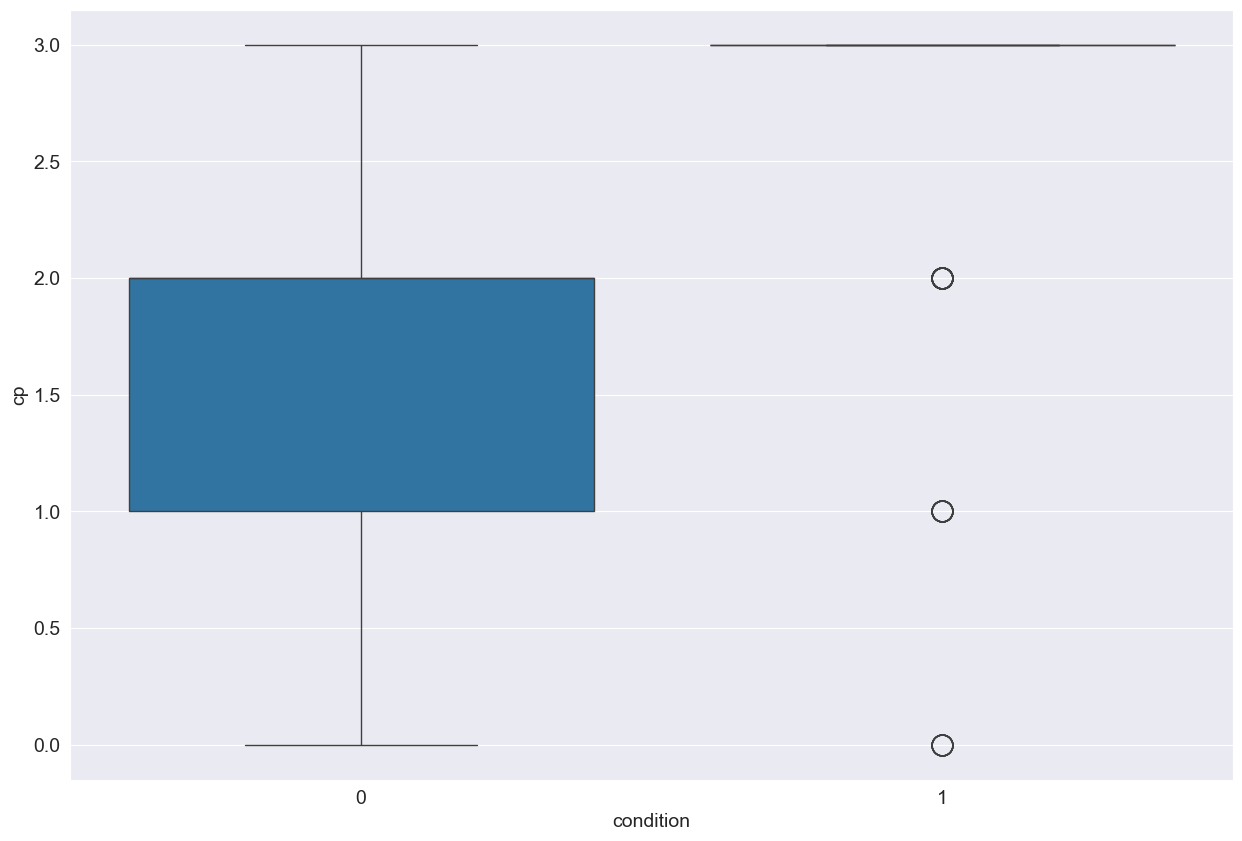

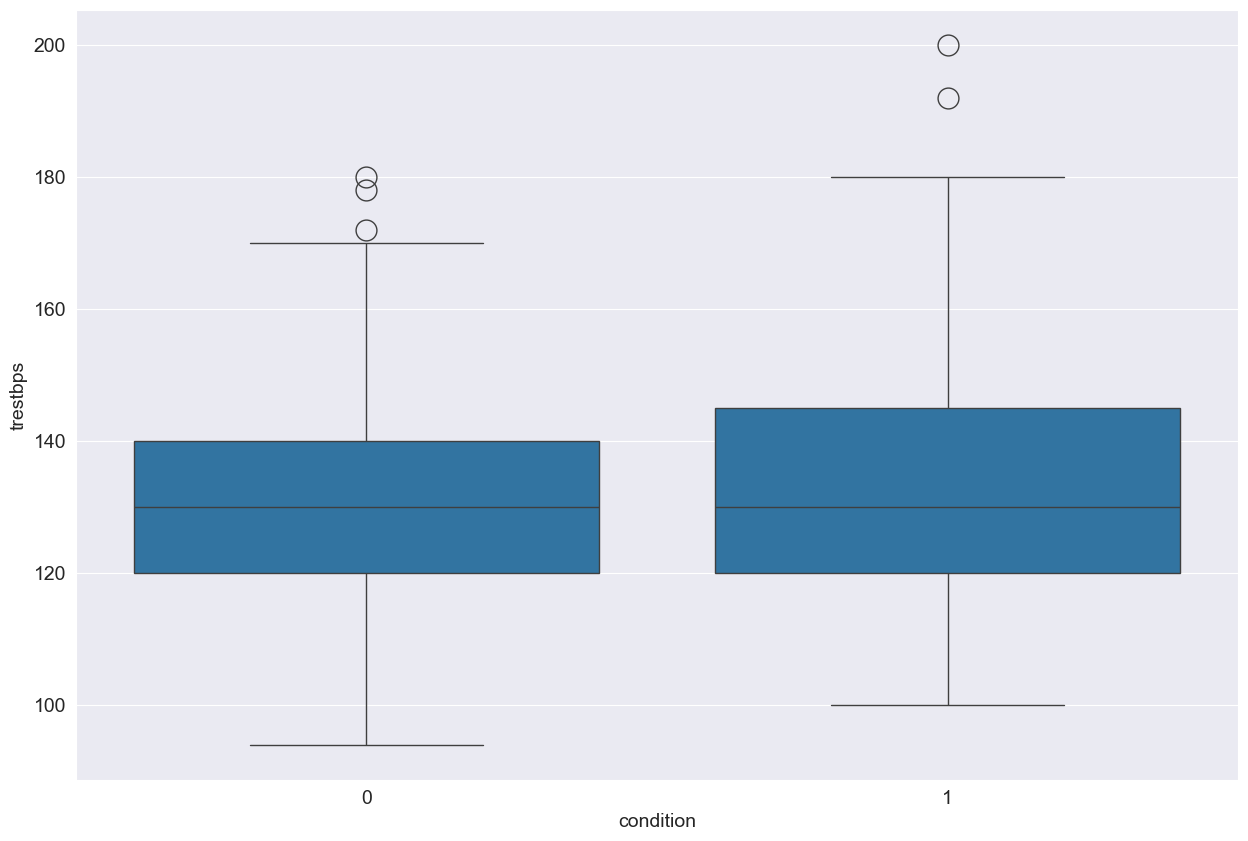

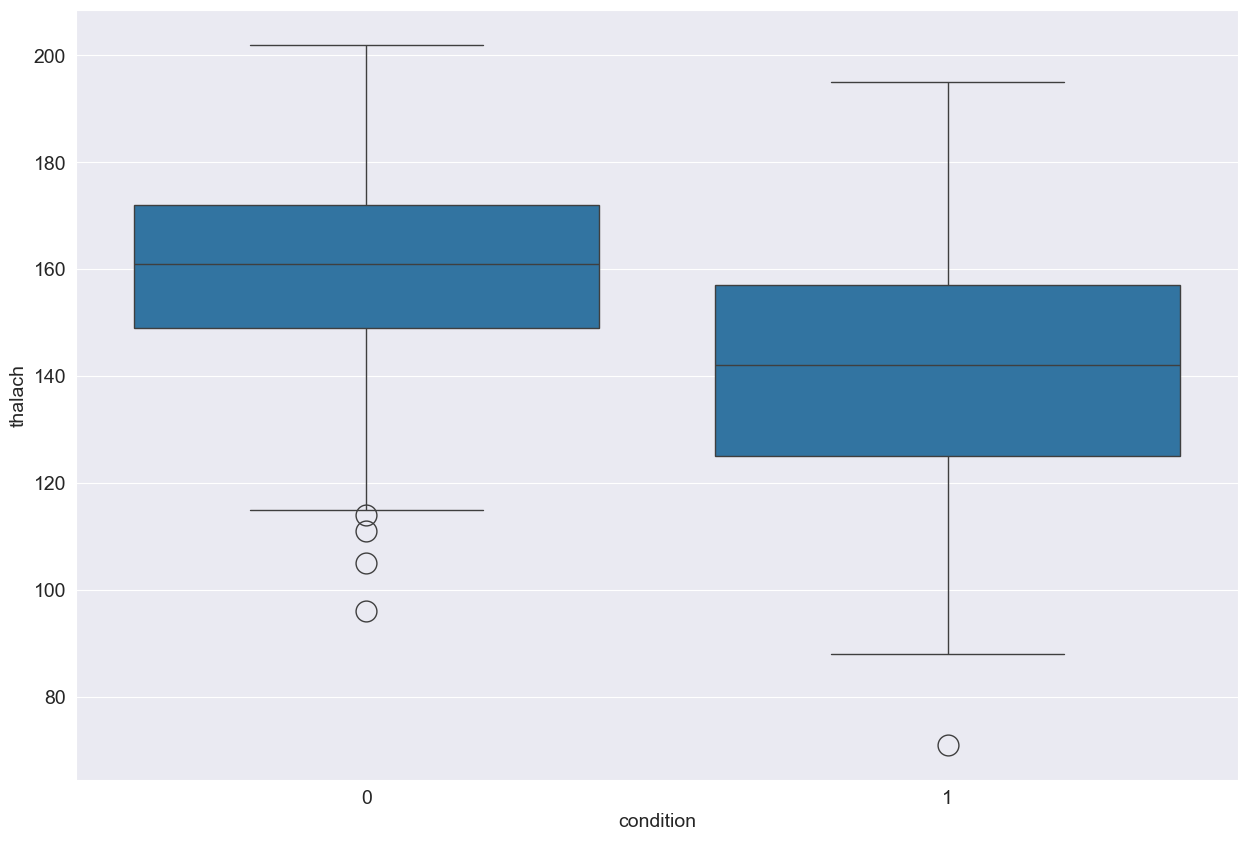

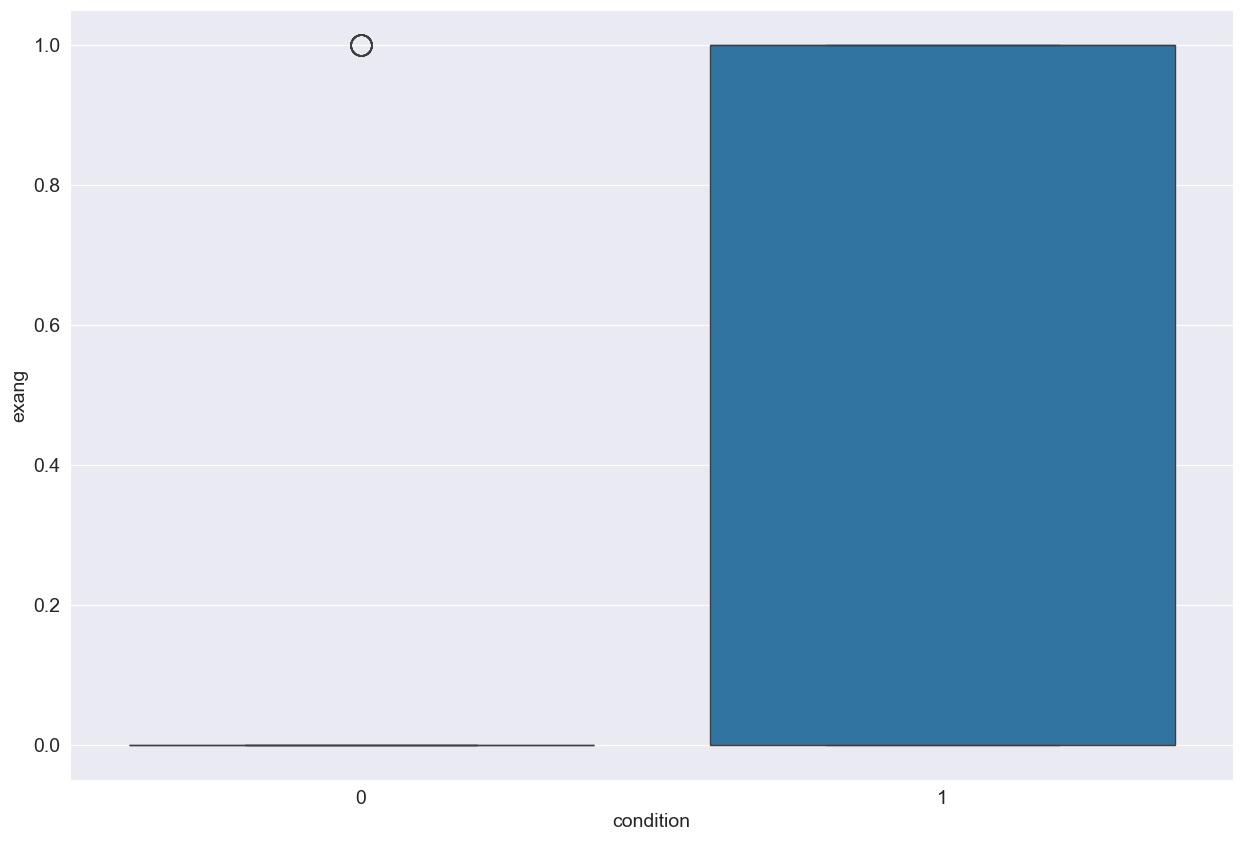

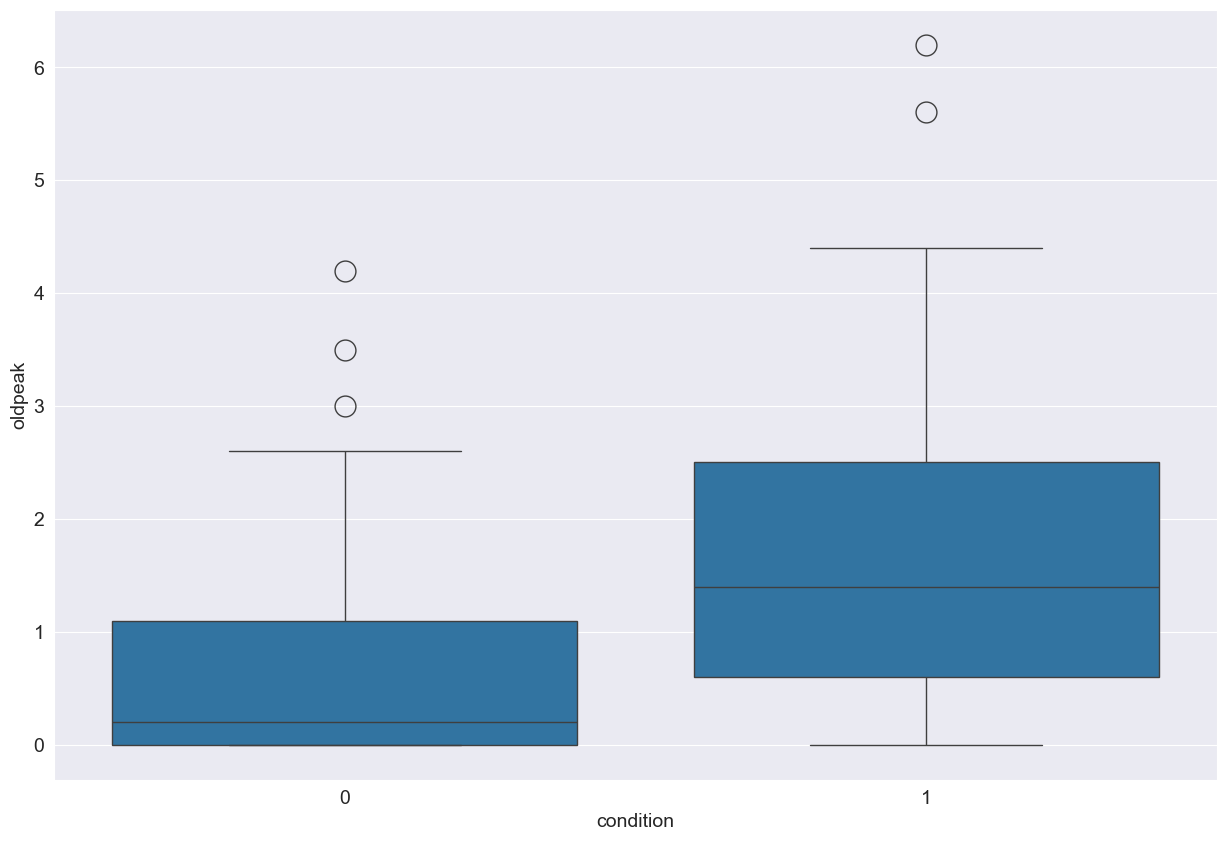

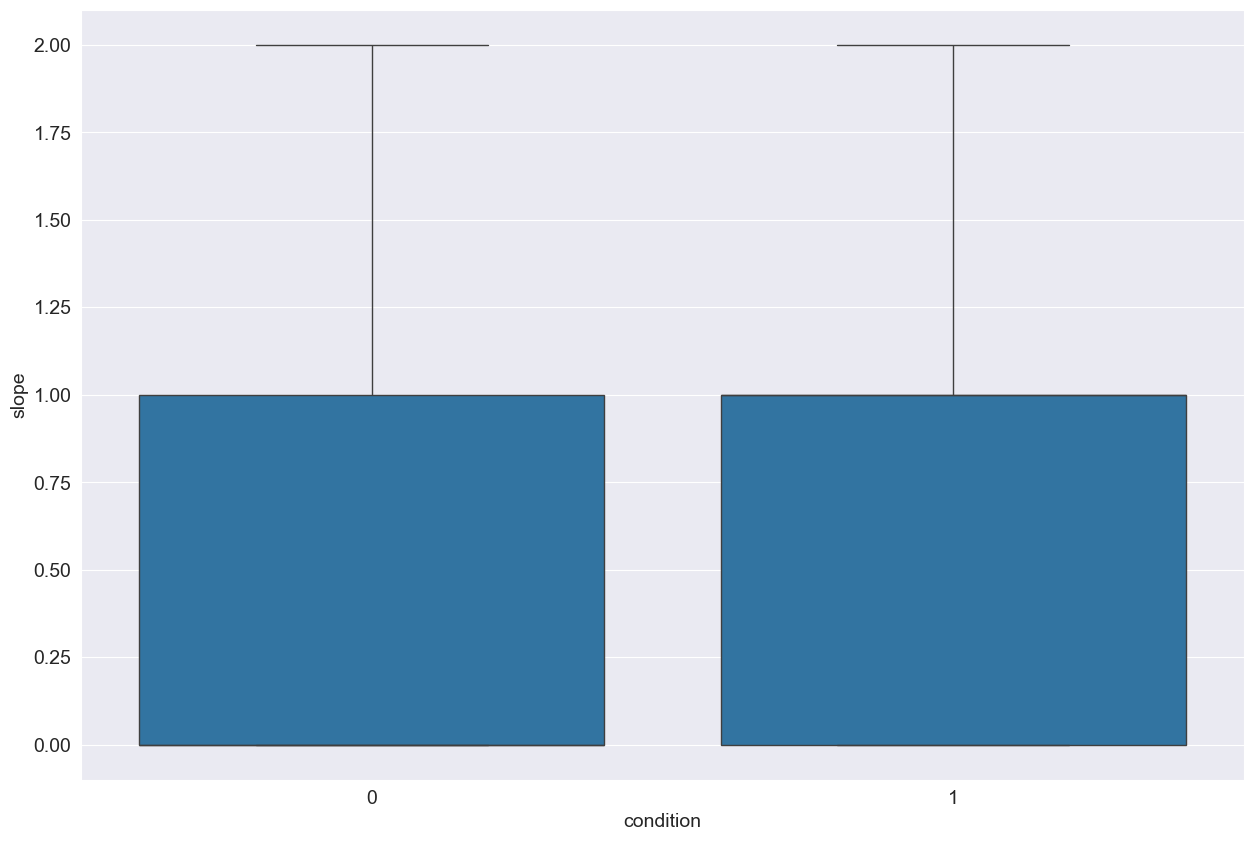

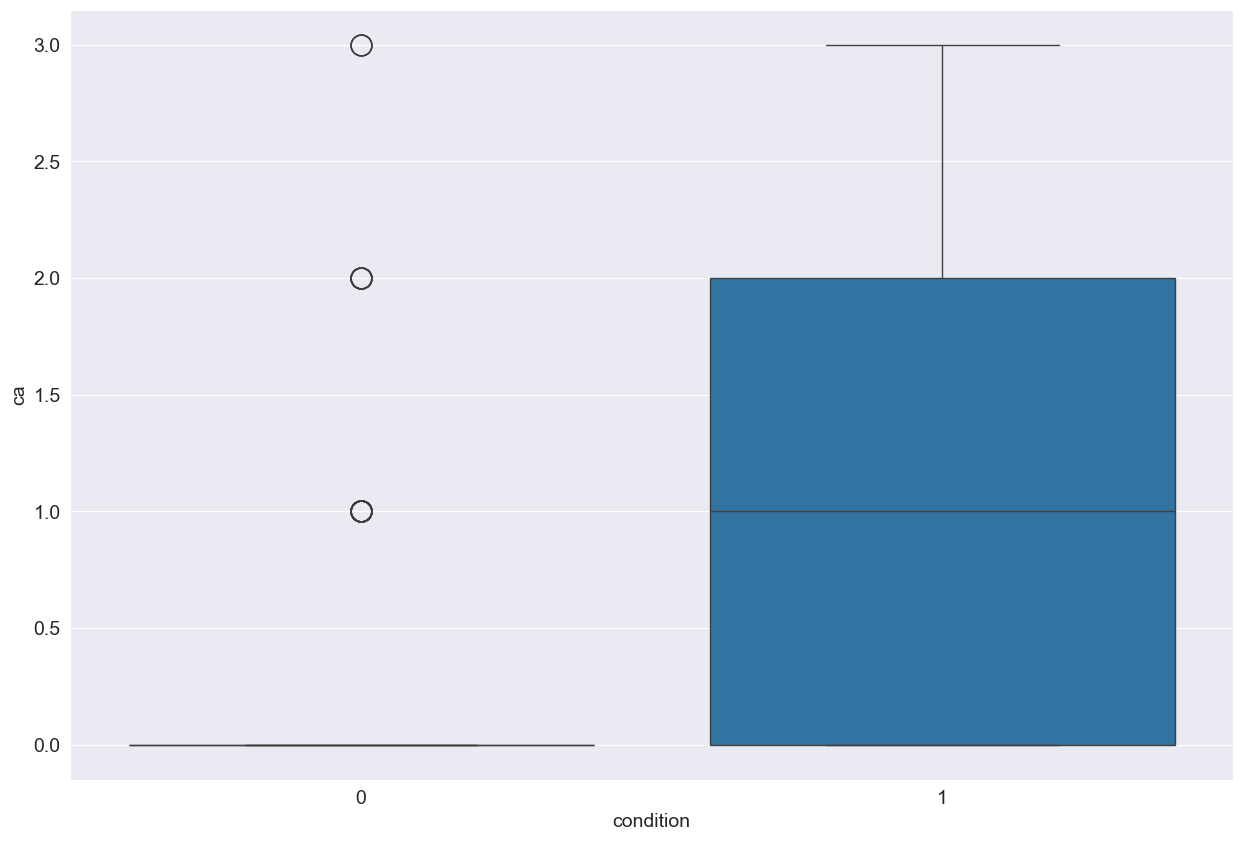

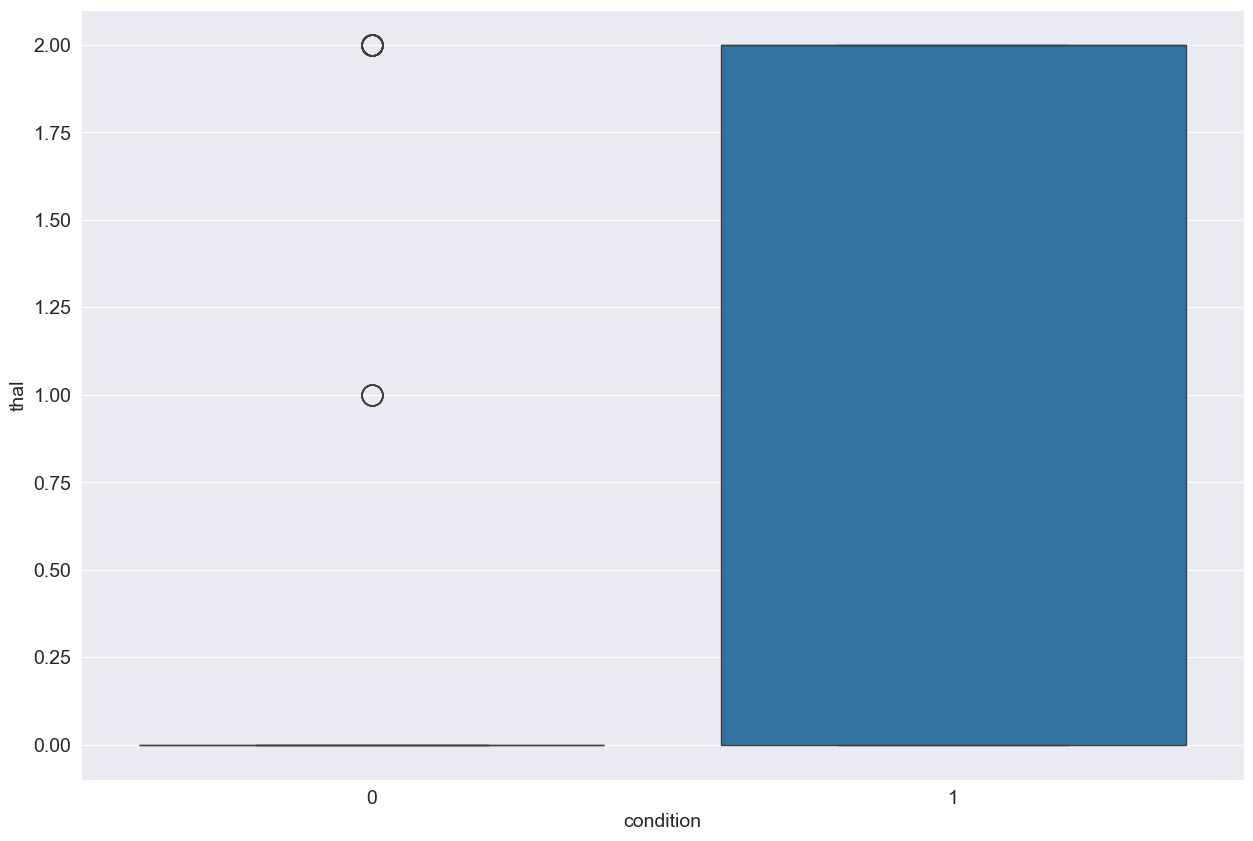

In [12]:
feautures = ['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

for i in feautures:
    sns.boxplot(data=df_src, x="condition", y=i)
    plt.show()


Из графиков "Ящики с усами", можно сделать вывод о том, что по уровню медиан можно выделить следующие важные зависимости:
1. condition - oldpeak. Но необходимо учесть, что у этьй зависимости есть достаочно далекие выобрсы;
2. condition - thalach. Аналогичная ситуация;
3. condition - age.

Попробуем вывести корреляционную матрицу. Для начала, выведем значения в терминал:

In [13]:
correlation_mtrx = df_src.corr()
correlation_mtrx

age       sex        cp  trestbps      chol       fbs  \
age        1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex       -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp         0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps   0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol       0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs        0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg    0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach   -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang      0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak    0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope      0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca         0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal       0.120795  0.370556  0.266275  0.130612  0.023441  0.051038   
condition  0.227075  0.278467  0.408945  0.153490  0.080285  0.003167   

            restecg   thalach     exang   oldpeak     slope        ca  \
age        0.149917 -0.394563  0.096489  0.197123  0.159405  0.362210   
sex        0.033897 -0.060496  0.143581  0.106567  0.033345  0.091925   
cp         0.063905 -0.339308  0.377525  0.203244  0.151079  0.235644   
trestbps   0.149242 -0.049108  0.066691  0.191243  0.121172  0.097954   
chol       0.165046 -0.000075  0.059339  0.038596 -0.009215  0.115945   
fbs        0.068831 -0.007842 -0.000893  0.008311  0.047819  0.152086   
restecg    1.000000 -0.072290  0.081874  0.113726  0.135141  0.129021   
thalach   -0.072290  1.000000 -0.384368 -0.347640 -0.389307 -0.268727   
exang      0.081874 -0.384368  1.000000  0.289310  0.250572  0.148232   
oldpeak    0.113726 -0.347640  0.289310  1.000000  0.579037  0.294452   
slope      0.135141 -0.389307  0.250572  0.579037  1.000000  0.109761   
ca         0.129021 -0.268727  0.148232  0.294452  0.109761  1.000000   
thal       0.013612 -0.258386  0.323268  0.336809  0.260096  0.248825   
condition  0.166343 -0.423817  0.421355  0.424052  0.333049  0.463189   

               thal  condition  
age        0.120795   0.227075  
sex        0.370556   0.278467  
cp         0.266275   0.408945  
trestbps   0.130612   0.153490  
chol       0.023441   0.080285  
fbs        0.051038   0.003167  
restecg    0.013612   0.166343  
thalach   -0.258386  -0.423817  
exang      0.323268   0.421355  
oldpeak    0.336809   0.424052  
slope      0.260096   0.333049  
ca         0.248825   0.463189  
thal       1.000000   0.520516  
condition  0.520516   1.000000

Теперь, для удобного восприятия, визуализируем корреляционную матрицу:

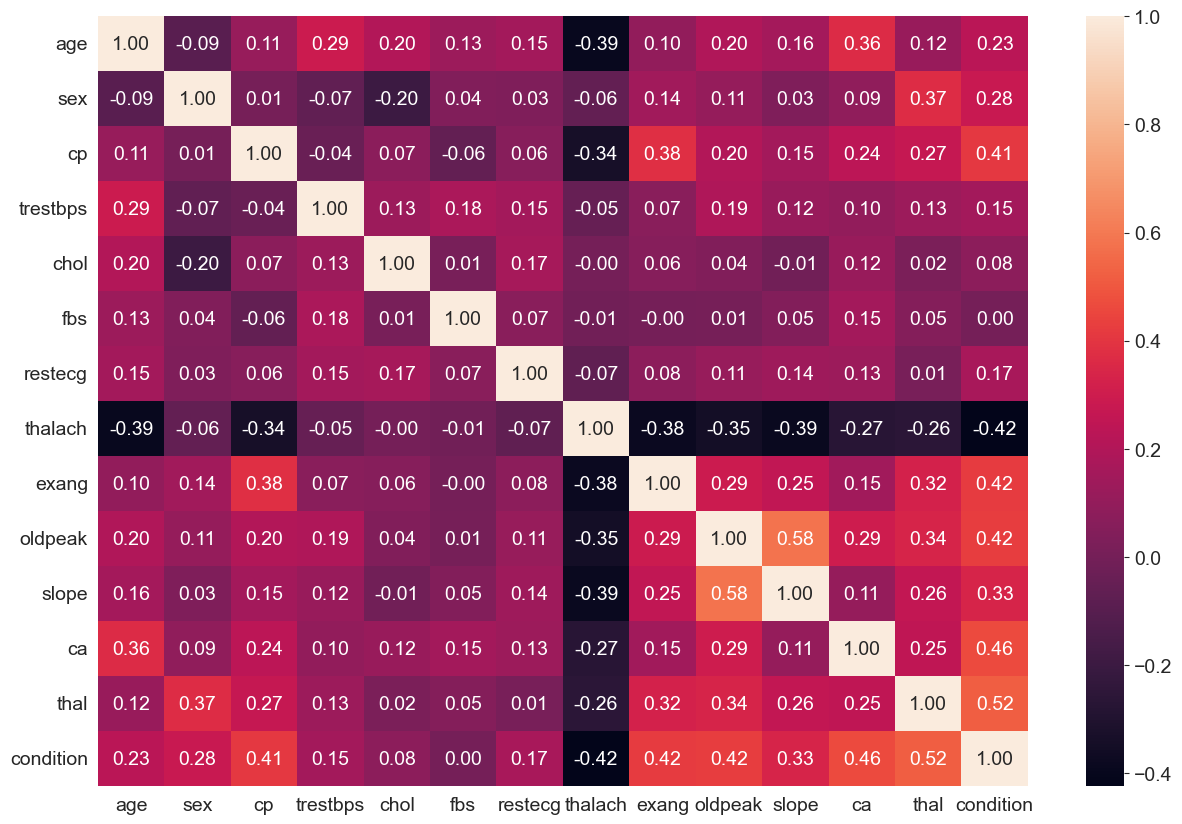

In [14]:
sns.heatmap(correlation_mtrx, annot=True, fmt=".2f")
plt.show()

Как можно заметить, почти все значения достаточно низко коррелируют между собой.

## Обучение модели

Попробуем обучить модель и снять соответсвующие метрики.

Для начала, доимпортируем необходимые библиотеки в первые блоки кода для обучения и снятия метрик. 



Теперь, разделим данные на train и test со стратификацией:

In [15]:
df_train, df_test = train_test_split(df_src, test_size=0.3, stratify=df_src["condition"], random_state=RANDOM_SEED)

y_train = df_train.pop("condition")
y_test = df_test.pop("condition")

# Логистическая регрессия
logreg = LogisticRegression(random_state=RANDOM_SEED, max_iter=1000) # max_iter - из-за предупржедения в терминале
logreg.fit(df_train, y_train)

print(f"Train/test shapes: {df_train.shape}, {df_test.shape}")
print(logreg.classes_)

Train/test shapes: (207, 13), (90, 13)
[0 1]


Снимем первоначальную метрику accuracy:

In [16]:
y_pred = logreg.predict(df_test)

accuracy_value = accuracy_score(y_test, y_pred)

print(f"Accuracy value: {accuracy_value}")

Accuracy value: 0.8777777777777778


Далее, проверим нашу модель с помощью матрицы ошибок (confusion_matrix):

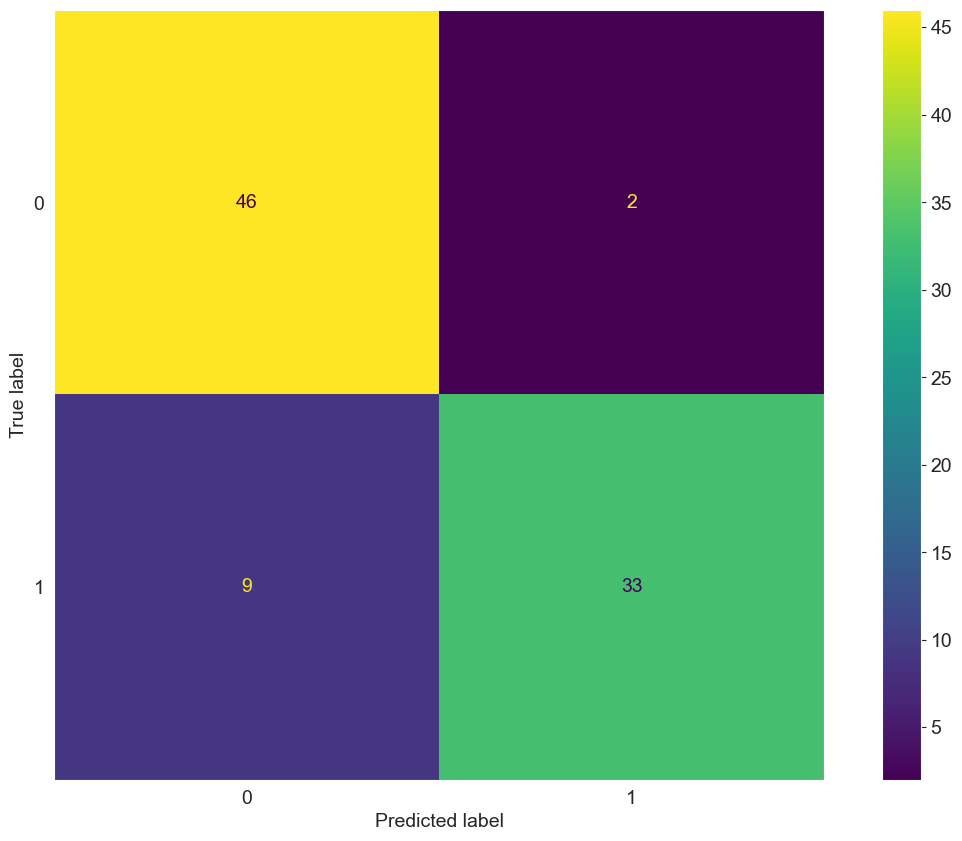

[[46  2]
 [ 9 33]]


In [17]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
plt.show()
print(cm)

По матрице ошибок, можно сделать следующие выводы:

1. Модель 9 раз ошибается, предсказывая здорового человека(1) - больным(0);

2. Модель 2 раза ошибается, прдсказывая больного человека(0) - здоровым(1).

Всего мы видим: 33 TP, 46 TN, 9 FN и 2 FP.

Далее, снимем необходимые метрики:

In [18]:
# C macro усреднением
macro_f1 = f1_score(y_test, y_pred, average="macro")
print(f"F1 macro: {macro_f1}")

# C weighted усреднением
weighted_f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 weighted: {weighted_f1}")

# recall и precision с macro усреднением
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

dict_metrics = {"recall": recall, "precision": precision}
print("Показатели:", dict_metrics)

F1 macro: 0.8751733703190014
F1 weighted: 0.8763754045307445
Показатели: {'recall': 0.8720238095238095, 'precision': 0.8896103896103895}


Как видно по метрикам, модель выглядит достаточно неплохой. Но давайте попробуем улучшить их!

## Возвращаемся к визуализации и пробуем очистку данных 🧹

Опираясь на корреляционную матрицу, попробуем убрать максимально слабые значения корреляции, по сравнению с другими:

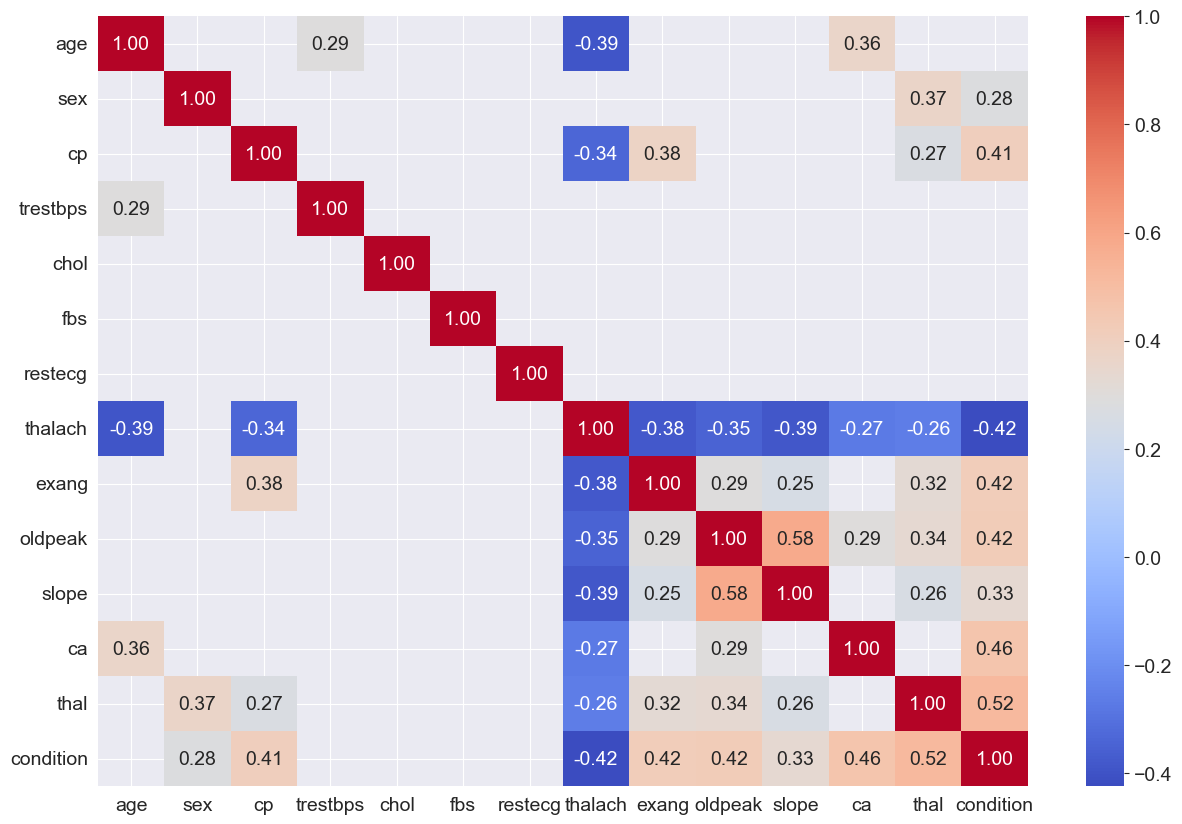

In [19]:
correlation_mtrx = df_src.corr()

# Порог(все что ниже данного порога - очищаем)
threshold = 0.25

for i in range(correlation_mtrx.shape[0]): 
    for j in range(correlation_mtrx.shape[1]): 
        if abs(correlation_mtrx.iloc[i, j]) < threshold: 
            correlation_mtrx.iloc[i, j] = np.nan 

# Построение heatmap
sns.heatmap(correlation_mtrx, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()

In [20]:
# Выберем подходящие признаки после фильтрации

selected_features = correlation_mtrx["condition"].dropna().index.tolist()
selected_features.remove("condition")

print(f"Выбранные признаки: {selected_features}")

# Еще раз сделаем азделение данных и дальнейшее обучение
X = df_src[selected_features]
y = df_src["condition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Снимем Метрики
accuracy_value = accuracy_score(y_test, y_pred)
print(f"Accuracy после фильтрации признаков: {accuracy_value}")

macro_f1 = f1_score(y_test, y_pred, average="macro")
weighted_f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 macro: {macro_f1}")
print(f"F1 weighted: {weighted_f1}")

recall = recall_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")

dict_metrics = {"recall": recall, "precision": precision}
print("Показатели:", dict_metrics)



Выбранные признаки: ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Accuracy после фильтрации признаков: 0.8777777777777778
F1 macro: 0.8759243012908886
F1 weighted: 0.8769352884655555
Показатели: {'recall': 0.8735119047619048, 'precision': 0.8839877613462519}


Лучше, но давайте проверим по матрице ошибок:

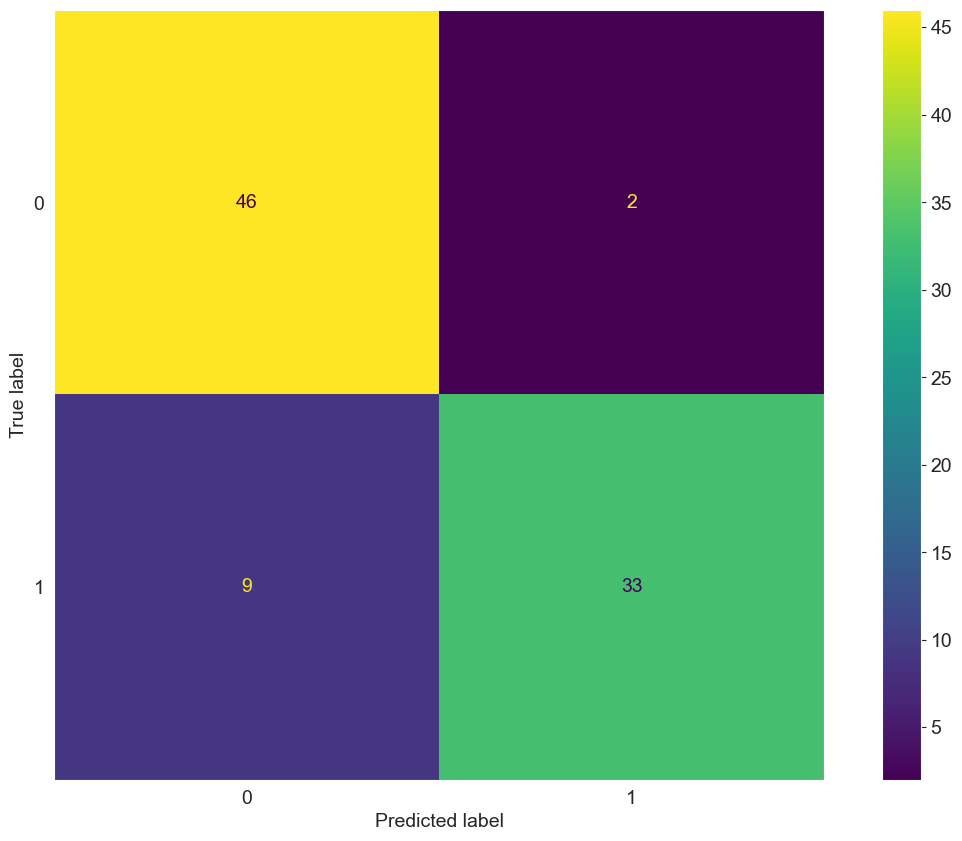

[[46  2]
 [ 9 33]]


In [21]:
cm_filtered = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
plt.show()
print(cm)

Отсюда, можно сделать вывод о том, что филтрация слабокоррелирующих признаков не помогает улучшить соответсвующие метрики данной модели (◞‸ ◟)💧

## А что если попробовать другую модель ? 🤔💭

Попробуем обучить модель, типа RandomForestClassifier

Запишем соответствующий пайплайн обучения:

In [22]:
from sklearn.ensemble import RandomForestClassifier

df_train, df_test = train_test_split(df_src, test_size=0.3, stratify=df_src["condition"], random_state=RANDOM_SEED)

y_train = df_train.pop("condition")
y_test = df_test.pop("condition")

# RandomForest
rnd_forest = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=1000) # n_estimators - из-за предупржедения в терминале
rnd_forest.fit(df_train, y_train)

print(f"Train/test shapes: {df_train.shape}, {df_test.shape}")
print(logreg.classes_)

Train/test shapes: (207, 13), (90, 13)
[0 1]


Снимем метрики данной модели:

In [23]:
y_pred = rnd_forest.predict(df_test)

accuracy_value = accuracy_score(y_test, y_pred)

print(f"Accuracy value: {accuracy_value}")

# C macro усреднением
macro_f1_forest = f1_score(y_test, y_pred, average="macro")
print(f"F1 macro: {macro_f1_forest}")

# C weighted усреднением
weighted_f1_forest = f1_score(y_test, y_pred, average="weighted")
print(f"F1 weighted: {weighted_f1_forest}")

# recall и precision с macro усреднением
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

dict_metrics_forest = {"recall": recall, "precision": precision}
print("Показатели:", dict_metrics_forest)

Accuracy value: 0.8222222222222222
F1 macro: 0.8190045248868778
F1 weighted: 0.82061337355455
Показатели: {'recall': 0.8169642857142858, 'precision': 0.8287037037037037}


Посмотрим матрицу ошибок:

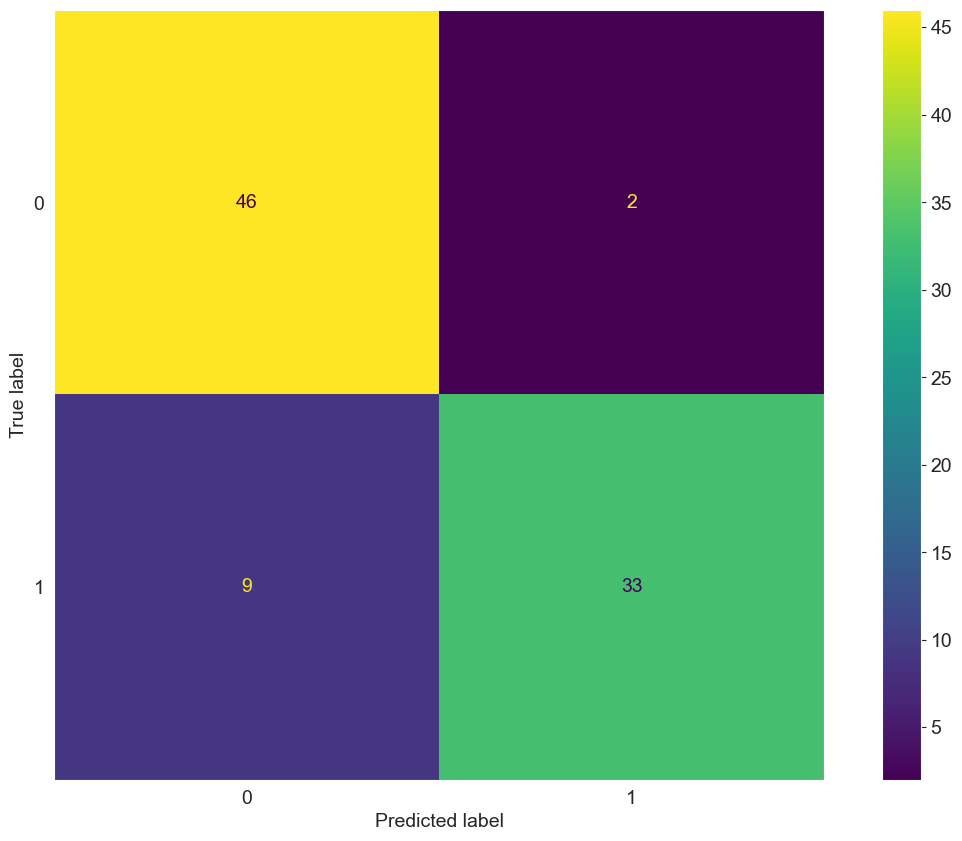

[[46  2]
 [ 9 33]]


In [24]:
cm_forest = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=rnd_forest.classes_)
disp.plot()
plt.grid(False)
plt.show()
print(cm)

Как можно заметить, смена модели никак не помогла в улучшении метрик. Наоборот, модель RandomForest показали метрики хуже.

 Отсюда, можно сделать вывод о том, что логистическая регрессия куда лучше справлятеся с обучением.

## Мысли 🤔💭

В ходе выполнения данной работы, можно сделать вывод о том, что модель логистической регрессии иметь лучшие показатели, по сравнению с моделью RandomForest. Для улучшения матрицы ошибок, можно попробовать другие, более сложные модели, которые должны в какой то мере улучшить метрики и уменьшить число ошибок. Плюс ко всему, можно попробовать на этапе предобработки данных найти все таки те данные, которые можно отфильтровать, и тем самым улучшить показатели модели. 

## P.S. А что если попробовать масштабировать признаки (StandardScaler) ???

Запишем соответсвующий пайплайн модели с обучением и метриками:

In [25]:
df_train, df_test = train_test_split(df_src, test_size=0.3, stratify=df_src["condition"], random_state=RANDOM_SEED)

y_train = df_train.pop("condition")
y_test = df_test.pop("condition")

scaler = StandardScaler()
df_train = scaler.fit_transform(df_train)
df_test = scaler.transform(df_test)

# Логистическая регрессия
logreg = LogisticRegression(random_state=RANDOM_SEED, max_iter=1000) # max_iter - из-за предупржедения в терминале
logreg.fit(df_train, y_train)

print(f"Train/test shapes: {df_train.shape}, {df_test.shape}")
print(logreg.classes_)

y_pred = logreg.predict(df_test)

accuracy_value = accuracy_score(y_test, y_pred)

print(f"Accuracy value: {accuracy_value}")

# C macro усреднением
macro_f1_scaler = f1_score(y_test, y_pred, average="macro")
print(f"F1 macro: {macro_f1_forest}")

# C weighted усреднением
weighted_f1_scaler = f1_score(y_test, y_pred, average="weighted")
print(f"F1 weighted: {weighted_f1_forest}")

# recall и precision с macro усреднением
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

dict_metrics_scaler = {"recall": recall, "precision": precision}
print("Показатели:", dict_metrics_scaler)


Train/test shapes: (207, 13), (90, 13)
[0 1]
Accuracy value: 0.8777777777777778
F1 macro: 0.8190045248868778
F1 weighted: 0.82061337355455
Показатели: {'recall': 0.8720238095238095, 'precision': 0.8896103896103895}


Выведем матрицу ошибок:

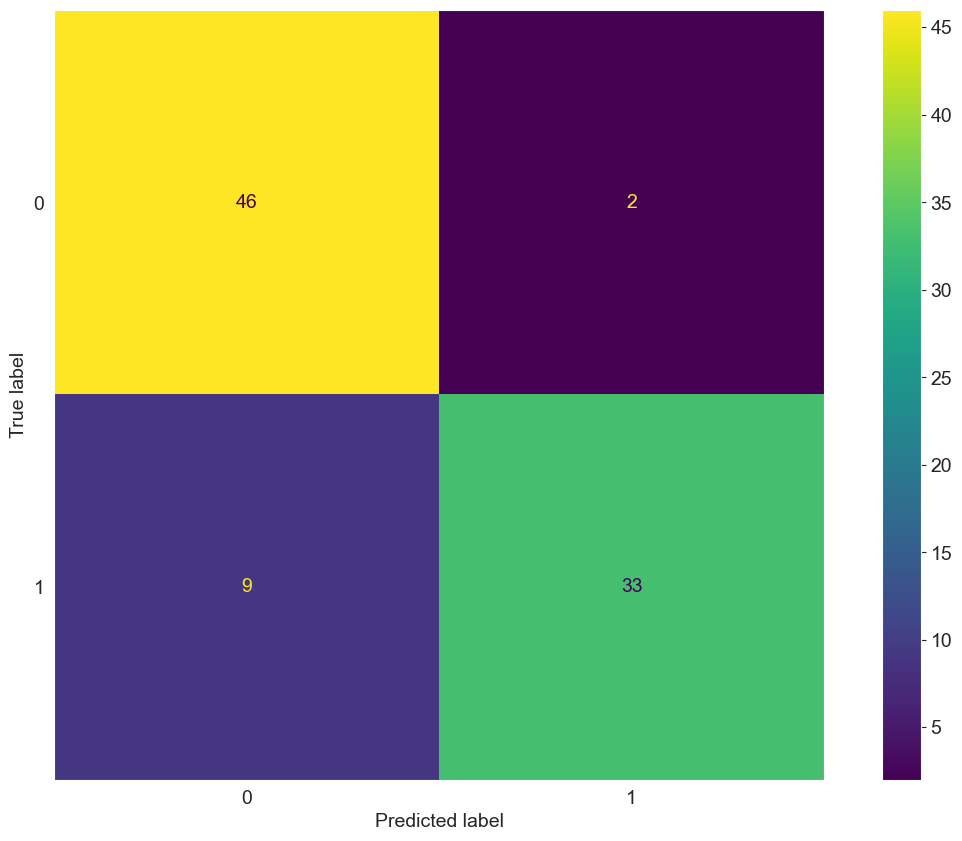

[[46  2]
 [ 9 33]]


In [26]:
cm_scaler = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
plt.show()
print(cm)

## Итог:

Как мы видим, классическое масштабирование признаков, методом `StandardScaler()` не помог улучшить метрики ☹️

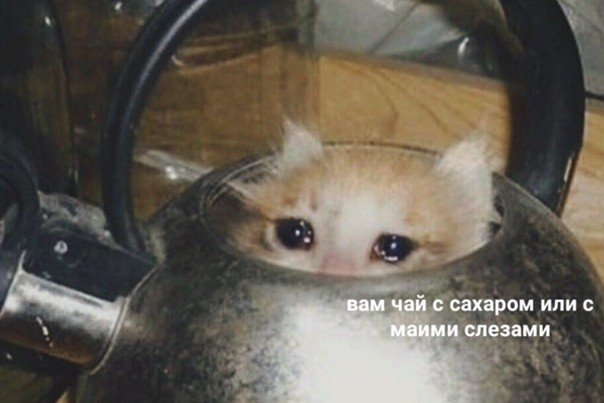